In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor

import os
from settings import BASE_DIR
from data import processing_data
# Loading our dataset

data_path = os.path.join(BASE_DIR, "dataset\movies_data_processed_v2.csv")
df = pd.read_csv(data_path)
df['log_gross'] = np.log1p(df['gross'])

df['log_gross_bin'] = pd.qcut(df['log_gross'], q=10, labels=False)
df.head()

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
C:\Users\huynh\AppData\Local\Temp\ipykernel_10360\1855360525.py:11: SyntaxWarning: invalid escape sequence '\m'
  data_path = os.path.join(BASE_DIR, "dataset\movies_data_processed_v2.csv")


,name,genres,rating,no_of_votes,meta_score,release_date,gross,budget,countries,log_gross,log_gross_bin
0,Love Hurts,"Martial Arts, Action, Comedy",5.3,6800,34.0,2025.0,17235040.0,18000000.0,United States,16.662455,3
1,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",6.5,107000,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",16.740635,3
2,Puss in Boots: The Last Wish,"Animal Adventure, Computer Animation, Fairy Ta...",7.8,200000,73.0,2022.0,481757663.0,90000000.0,"United States, Japan",19.992952,9
3,The Fifth Element,"Sci-Fi Epic, Space Sci-Fi, Action, Adventure, ...",7.6,524000,52.0,1997.0,263920180.0,25000000.0,"France, United Kingdom",19.391157,8
4,Superman,"Sci-Fi Epic, Superhero, Urban Adventure, Actio...",7.4,195000,82.0,1978.0,300478449.0,55000000.0,"United States, United Kingdom, Switzerland, Pa...",19.520887,8


Fold 1
Training Metrics
R2 score: 0.7717
MSE: 16,492,657,731,393,378.0000
MLSE: 1.9495
MAPE: 7.17%
Test Metrics
R2 score: 0.5713
MSE: 25,431,470,895,132,644.0000
MLSE: 3.5159
MAPE: 282.56%


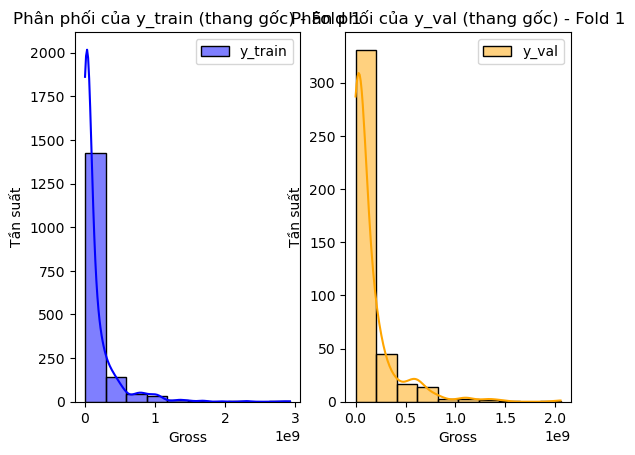

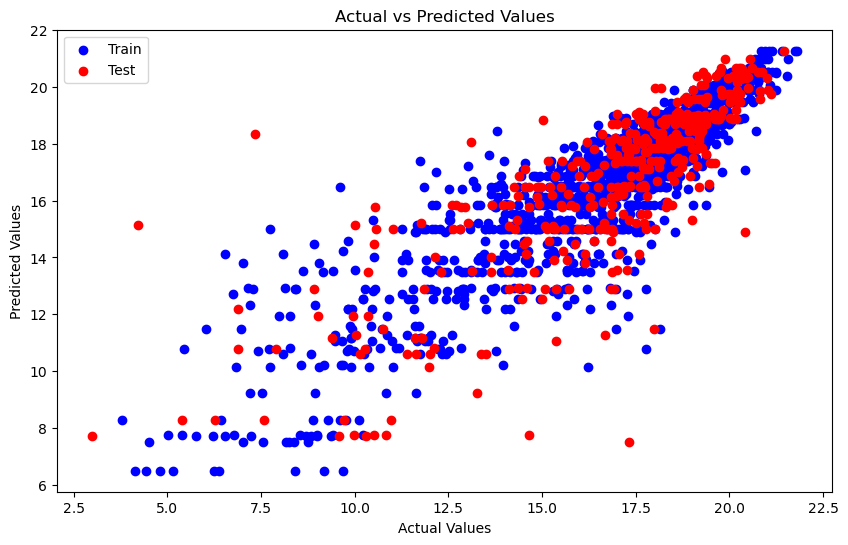

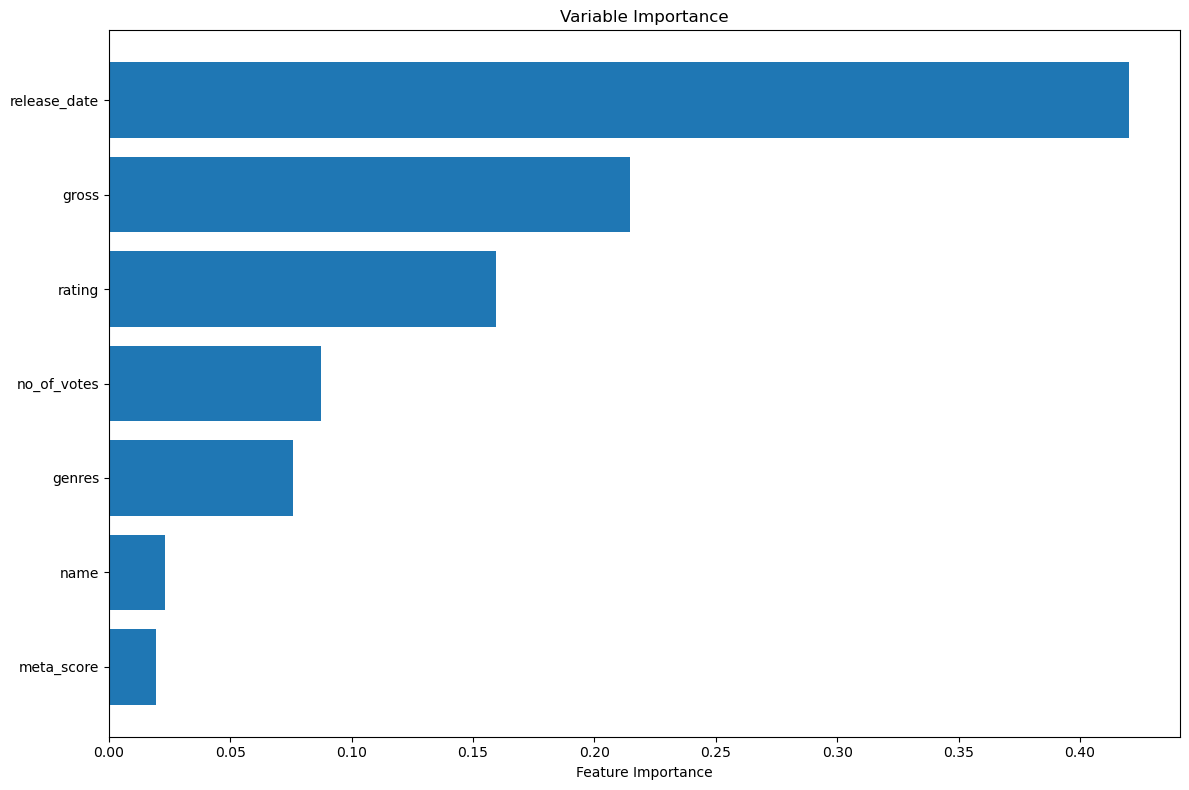

Fold 2
Training Metrics
R2 score: 0.7983
MSE: 13,646,341,162,500,966.0000
MLSE: 1.8595
MAPE: 6.34%
Test Metrics
R2 score: 0.5411
MSE: 35,648,174,778,659,612.0000
MLSE: 3.9950
MAPE: 65.26%


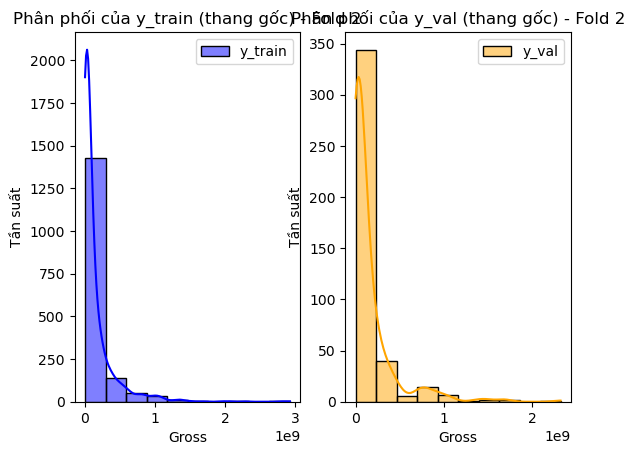

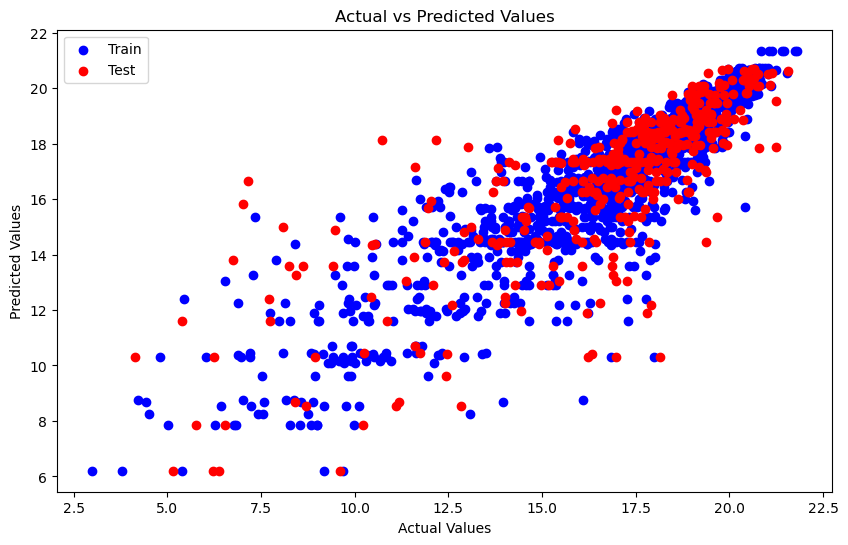

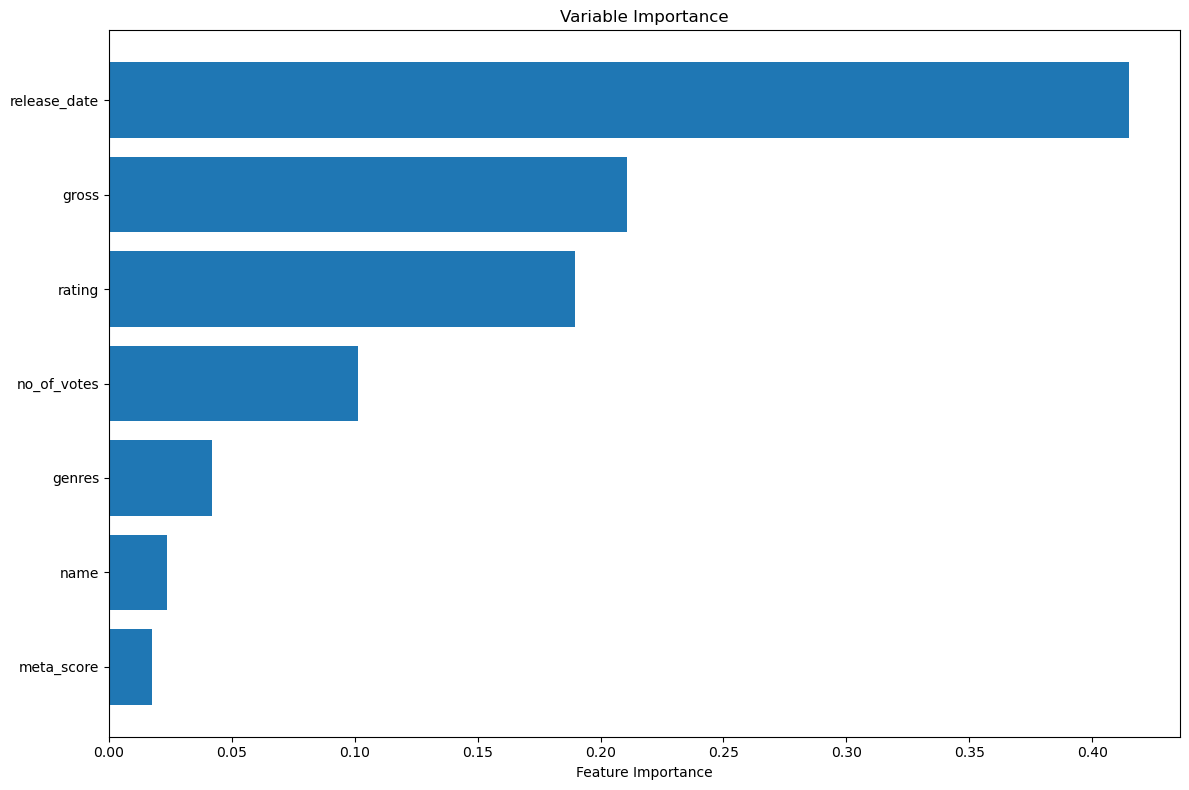

Fold 3
Training Metrics
R2 score: 0.7666
MSE: 14,536,738,299,883,458.0000
MLSE: 1.8017
MAPE: 5.96%
Test Metrics
R2 score: 0.5428
MSE: 45,319,683,511,722,592.0000
MLSE: 3.5069
MAPE: 23.49%


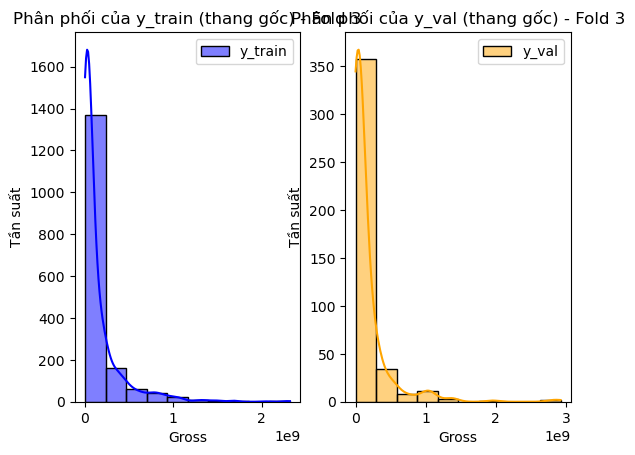

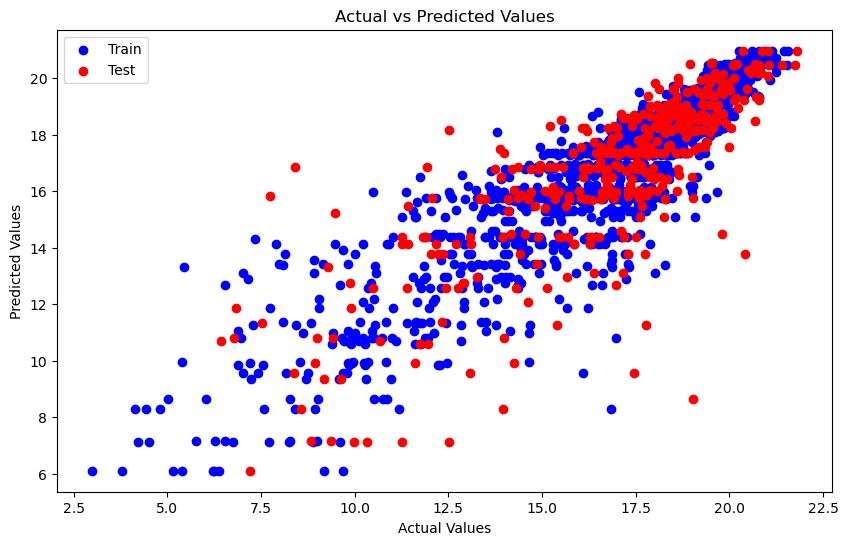

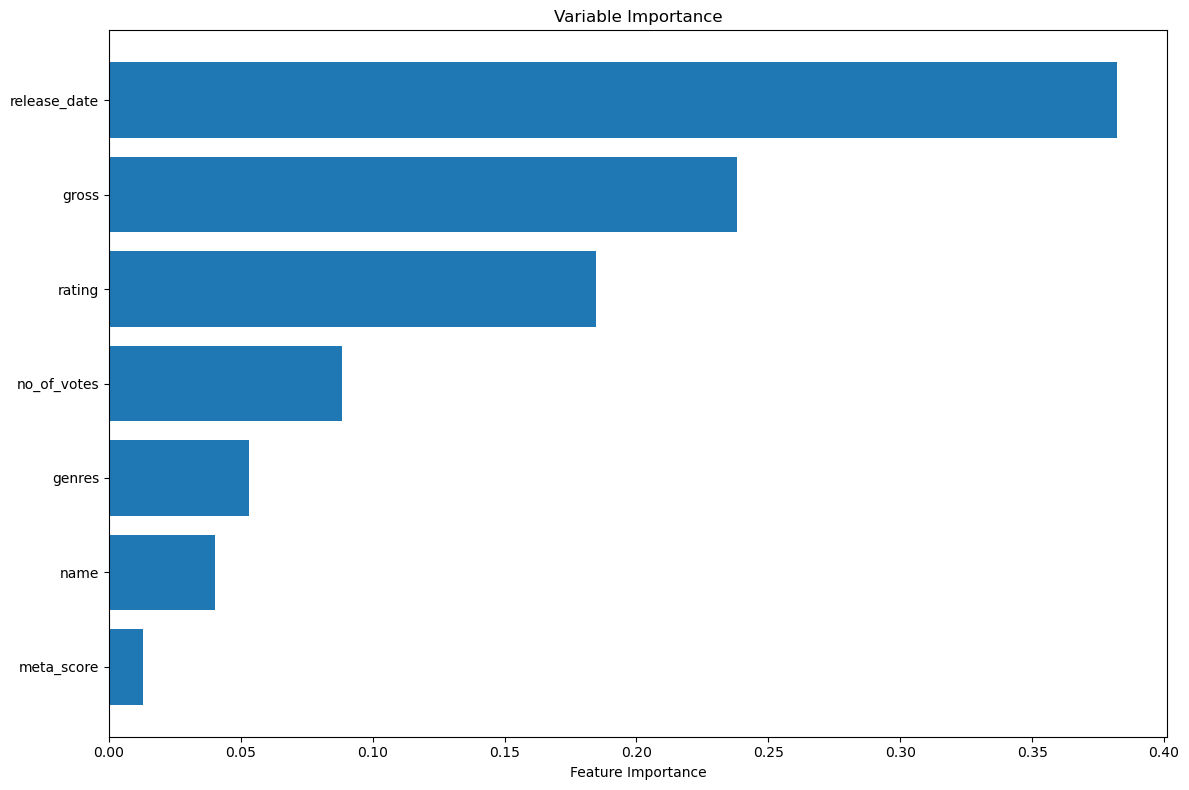

Fold 4
Training Metrics
R2 score: 0.7791
MSE: 16,401,264,776,024,364.0000
MLSE: 1.7083
MAPE: 6.24%
Test Metrics
R2 score: 0.5960
MSE: 20,705,920,046,247,424.0000
MLSE: 5.2913
MAPE: 121.40%


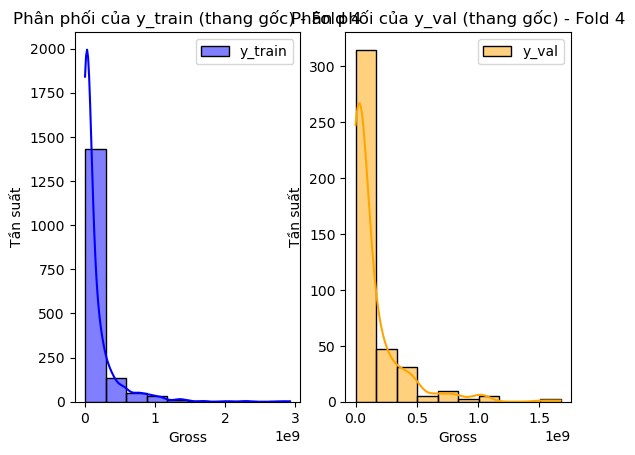

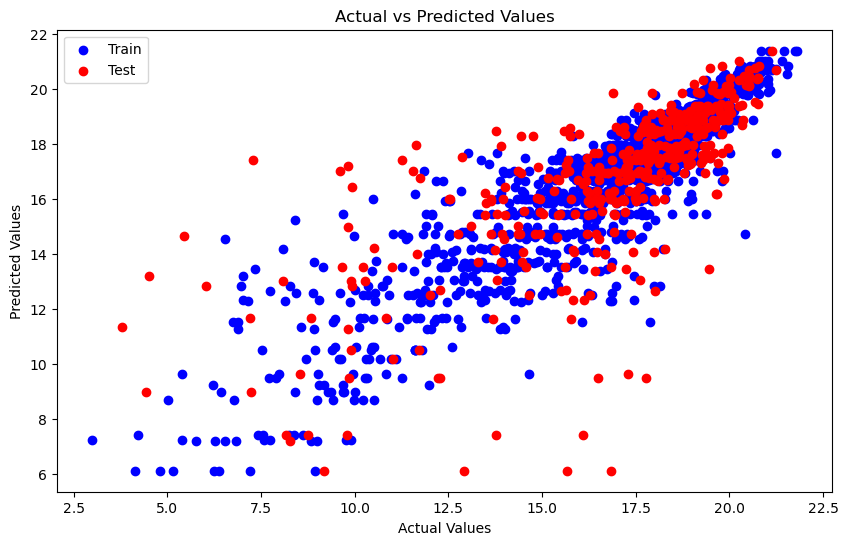

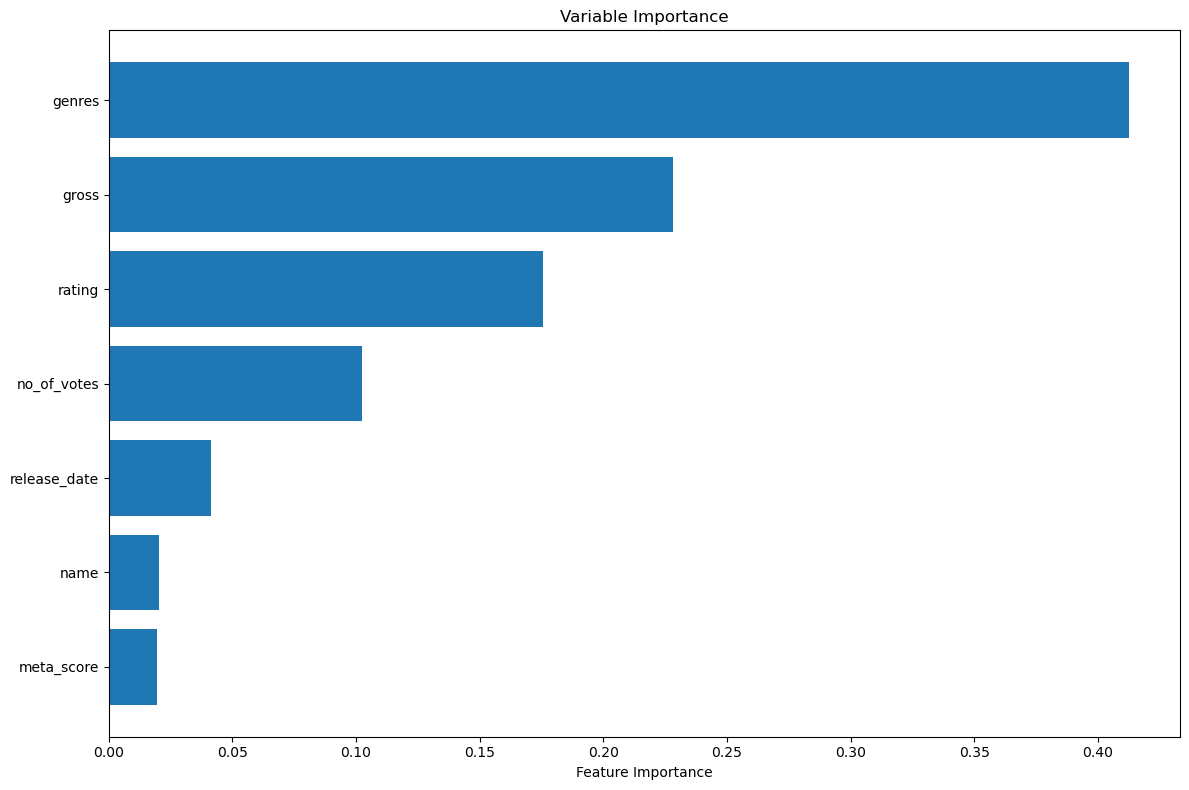

Fold 5
Training Metrics
R2 score: 0.8318
MSE: 12,092,237,656,354,532.0000
MLSE: 1.6389
MAPE: 5.43%
Test Metrics
R2 score: 0.4498
MSE: 33,415,728,622,879,748.0000
MLSE: 4.9899
MAPE: 76.27%


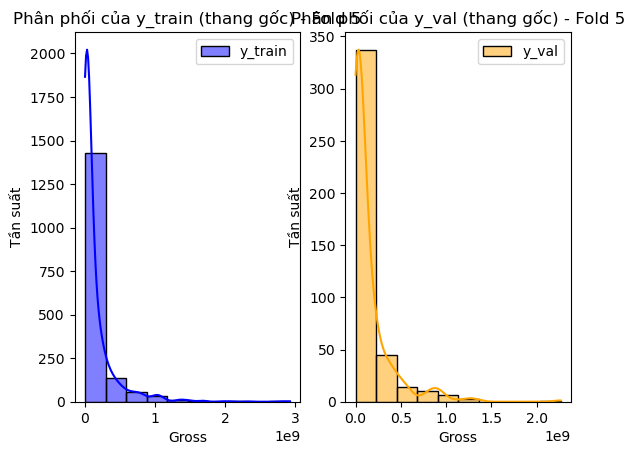

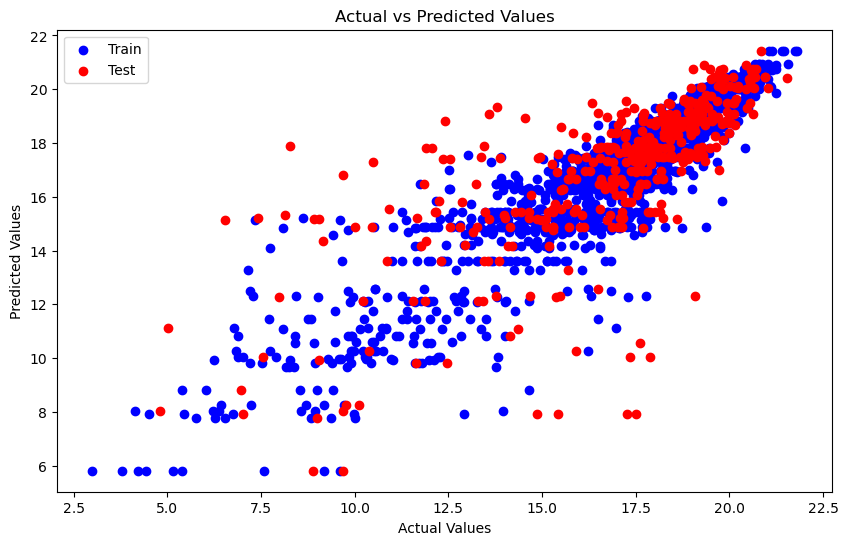

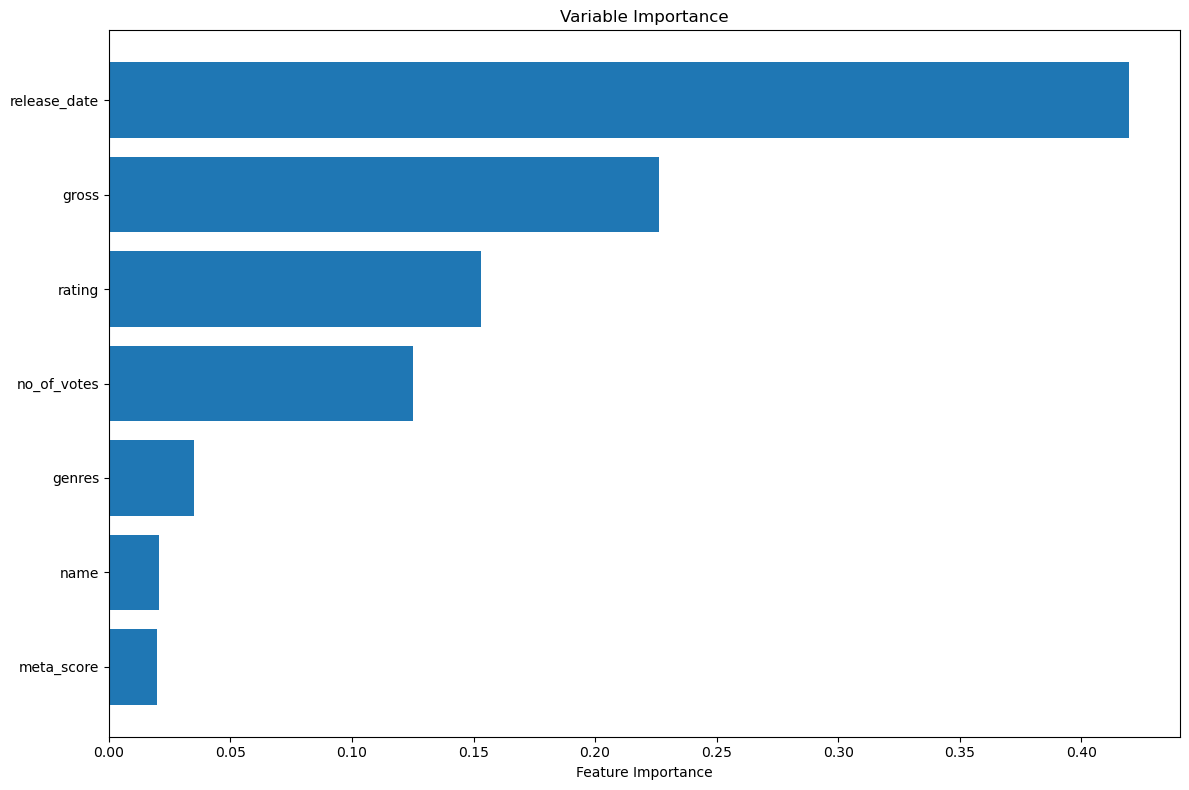

In [2]:
from evatuation import visualize_results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(df, df['log_gross_bin'])):
    print(f"Fold {fold + 1}")
    df_train = df.iloc[train_idx].copy()
    df_val = df.iloc[val_idx].copy()
    X_train, y_train, X_test, y_test = processing_data(df_train, df_val, fold=fold)
    model = DecisionTreeRegressor(
        max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42
    )
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    visualize_results(y_train, train_predictions, y_test, test_predictions, model = model, df = df, is_logged=True)


